# Japan Used Cars Price Prediction¶

# Problem Statement:



Cars' data was scraped from tc-v.com and it included Information about Japan's largest online used car marketplace. Ten features were assembled for each car in the dataset.

This dataset includes 10 features:


In [6]:
#Lets import necessary libraries for load dataset

import pandas as pd
import numpy as np
# Permanently changes the pandas settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv')
data.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [8]:
#Lest check the shape of the dataset
data.shape

(2318, 11)

In [9]:
#Lets check for null values in dataset
data.isna().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

So , Here we dont have any null values , We are good to proceed .

In [10]:
#Lets check for duplicates
data.duplicated().sum()

0

So we also dont have any duplicate value.

In [11]:
#Lets check the datatype of the dataset
data.dtypes

id                 int64 
price              int64 
mark               object
model              object
year               int64 
mileage            int64 
engine_capacity    int64 
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

So , Here we have 5 integer value and 6 Object value .

In [12]:
#Lets import visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

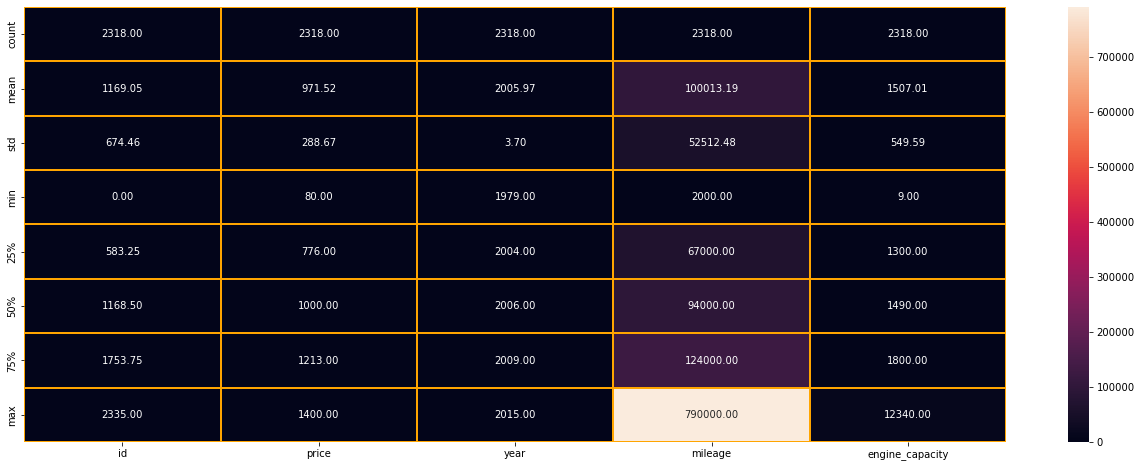

In [13]:
#Lets describe the dataset using (Using Heatmap)
plt.figure(figsize=(22,8))
sns.heatmap(data.describe(),annot=True,linewidths=0.3,linecolor='orange',fmt="0.2f")
plt.show()

# Observation

- We dont have any null values 

- We have outliers in engine_capacity,mileage

# Lets Do 

# Exploratory Data Analysis

In [14]:
#Before starting lets delete id number columns becasue it is unnecessory.
data.drop(columns='id',inplace=True)

In [15]:
#Lets check again the dataset
data.head()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


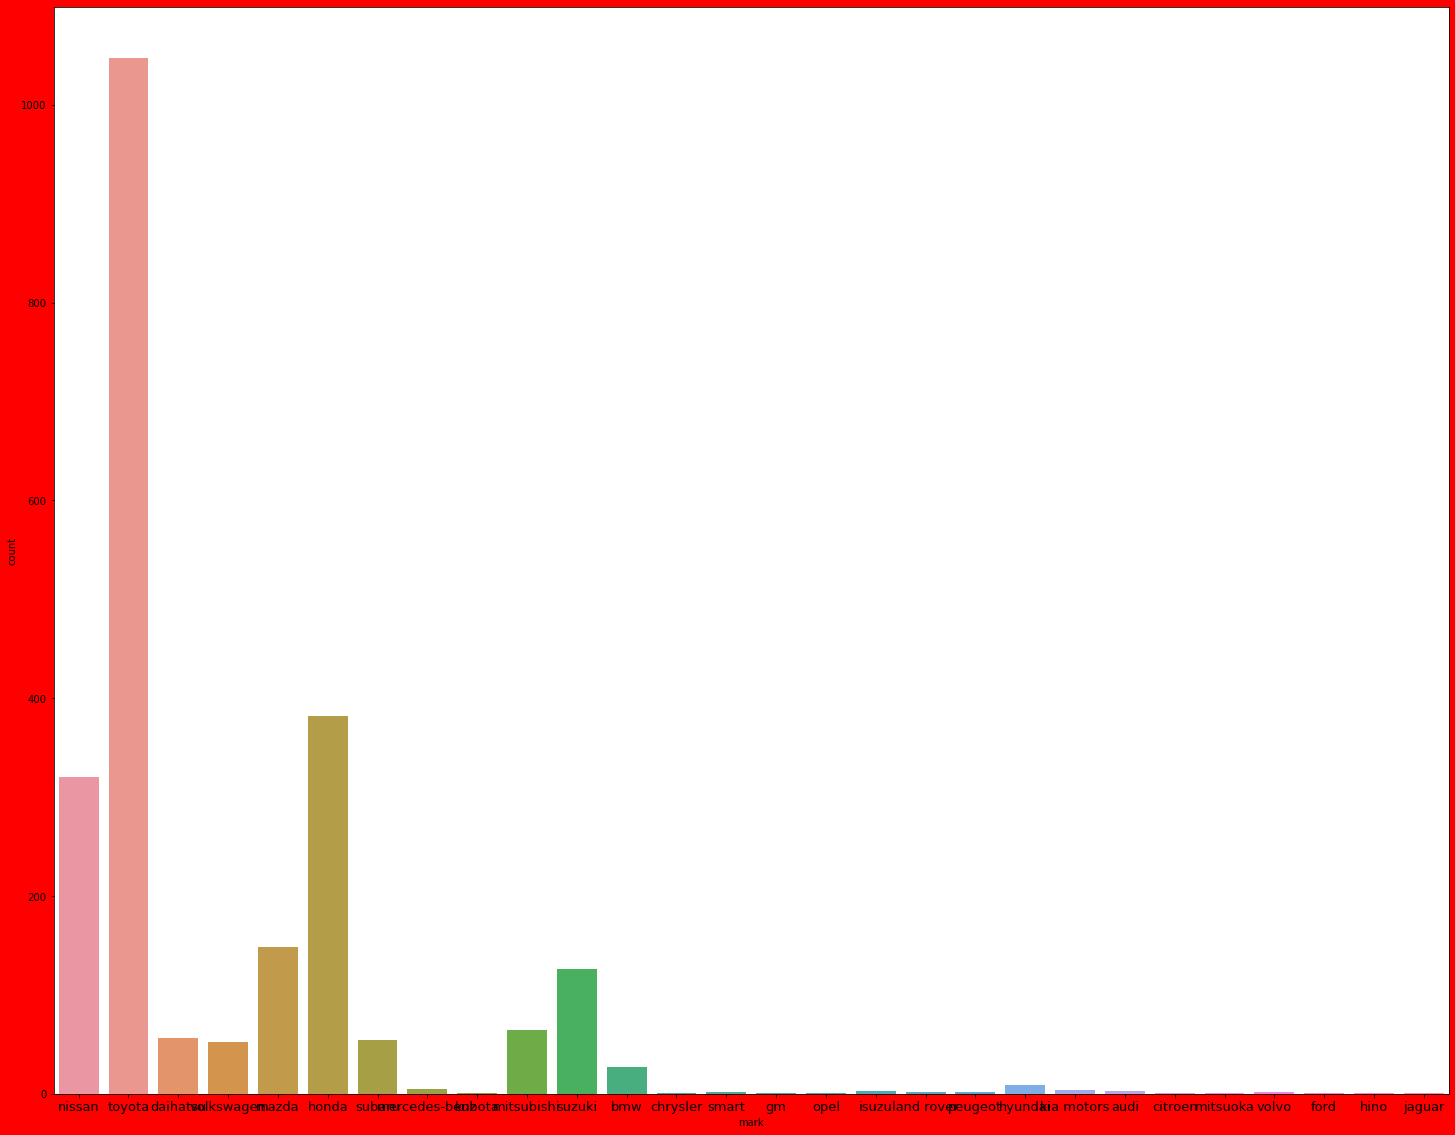

toyota           1047
honda            382 
nissan           320 
mazda            148 
suzuki           126 
mitsubishi       65  
daihatsu         56  
subaru           54  
volkswagen       52  
bmw              27  
hyundai          9   
mercedes-benz    5   
kia motors       4   
isuzu            3   
audi             3   
smart            2   
volvo            2   
land rover       2   
peugeot          2   
hino             1   
mitsuoka         1   
ford             1   
gm               1   
citroen          1   
opel             1   
chrysler         1   
kubota           1   
jaguar           1   
Name: mark, dtype: int64

In [16]:
#Lets use countplot mark (Using countplot)
plt.figure(figsize=(25,20),facecolor='red')
sns.countplot(x='mark',data=data)
plt.xticks(size=13)
plt.show()
data.mark.value_counts()

#  Observation




So , Here we have these companies car and counts of every company car

Toyota  -         1047



Honda -            382



Nissan -           320




Mazda -             148


Suzuki -           126



Mitsubishi -        65



Daihatsu  -        56



Subaru  -           54



Volkswagen -        52



Bmw -               27




Hyundai -             9



Mercedes-benz -      5



Kia motors  -        4



isuzu       -        3



Audi  -              3




Smart -               2




Volvo       -        2




Land rover   -       2



Peugeot  -           2




Hino    -            1



Mitsuoka  -         1



Ford   -             1



Gm    -              1



Citroen -            1



Opel   -             1



Chrysler   -         1



Kubota              1



Jaguar              1

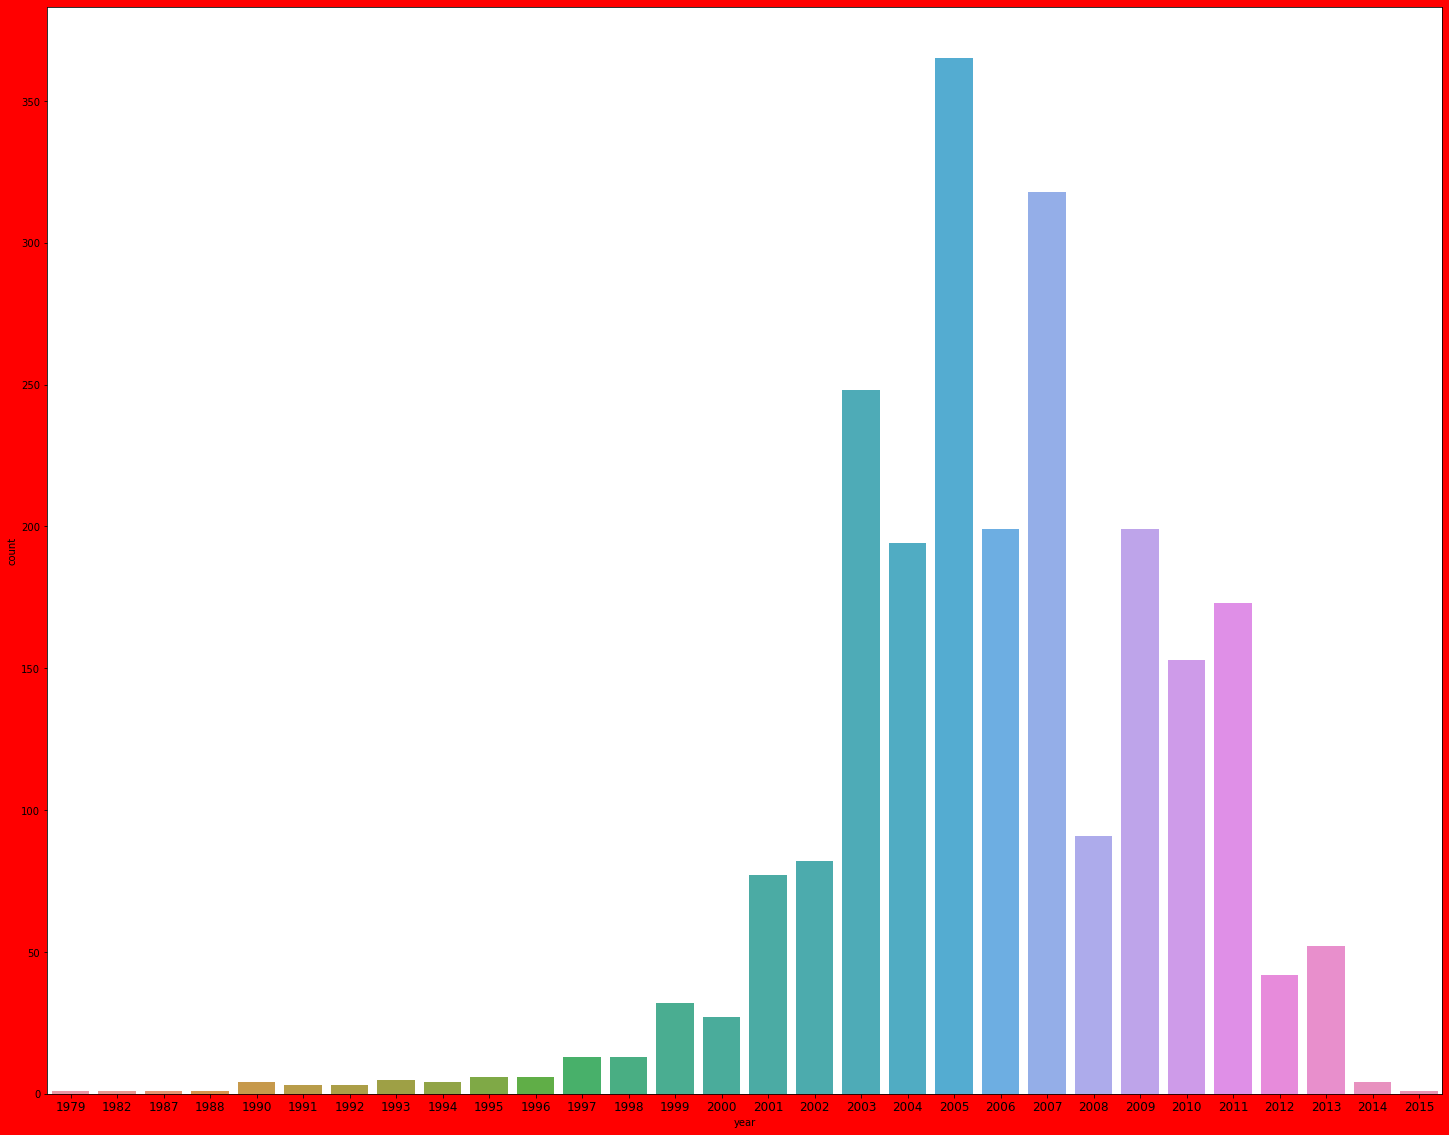

2005    365
2007    318
2003    248
2006    199
2009    199
2004    194
2011    173
2010    153
2008    91 
2002    82 
2001    77 
2013    52 
2012    42 
1999    32 
2000    27 
1998    13 
1997    13 
1996    6  
1995    6  
1993    5  
1994    4  
2014    4  
1990    4  
1991    3  
1992    3  
1979    1  
1982    1  
2015    1  
1987    1  
1988    1  
Name: year, dtype: int64

In [17]:
#lets plot year usnin count plot('year')
plt.figure(figsize=(25,20),facecolor='red')
sns.countplot(x='year',data=data)
plt.xticks(size=12)
plt.show()
data.year.value_counts()

# Observations


We have the registration year of all car .

2005 -   365 Cars

2007  -  318 Cars

2003   - 248 Cars

2006 -    199 Cars

2009  -  199 Cars

2004   - 194 Cars

2011    - 173 Cars

2010   - 153 Cars

2008   -  91 Cars

2002    - 82 Cars

2001    - 77 Cars

2013    - 52 Cars

2012    - 42 Cars
 
1999    - 32 Cars

2000    - 27 Cars

1998    - 13 Cars

1997    - 13 Cars

1996    -  6 Cars

1995     - 6 Cars

1993     - 5 Cars

1994     - 4 Cars

2014     - 4 Cars

1990   -   4 Cars

1991    -  3 Cars

1992     - 3 Cars

1979      - 1 Cars

1982     - 1 Cars

2015     - 1 Cars

1987     - 1 Cars

1988     - 1 Cars


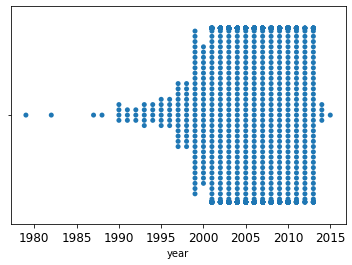

2005    365
2007    318
2003    248
2006    199
2009    199
2004    194
2011    173
2010    153
2008    91 
2002    82 
2001    77 
2013    52 
2012    42 
1999    32 
2000    27 
1998    13 
1997    13 
1996    6  
1995    6  
1993    5  
1994    4  
2014    4  
1990    4  
1991    3  
1992    3  
1979    1  
1982    1  
2015    1  
1987    1  
1988    1  
Name: year, dtype: int64

In [18]:
#Lets check maximum car sell from which year
sns.swarmplot(x='year',data=data,hue='model')
plt.xticks(size=12)
plt.show()
data.year.value_counts()

Clearly we can see that from 2001 to 2013 maximum car for sale .

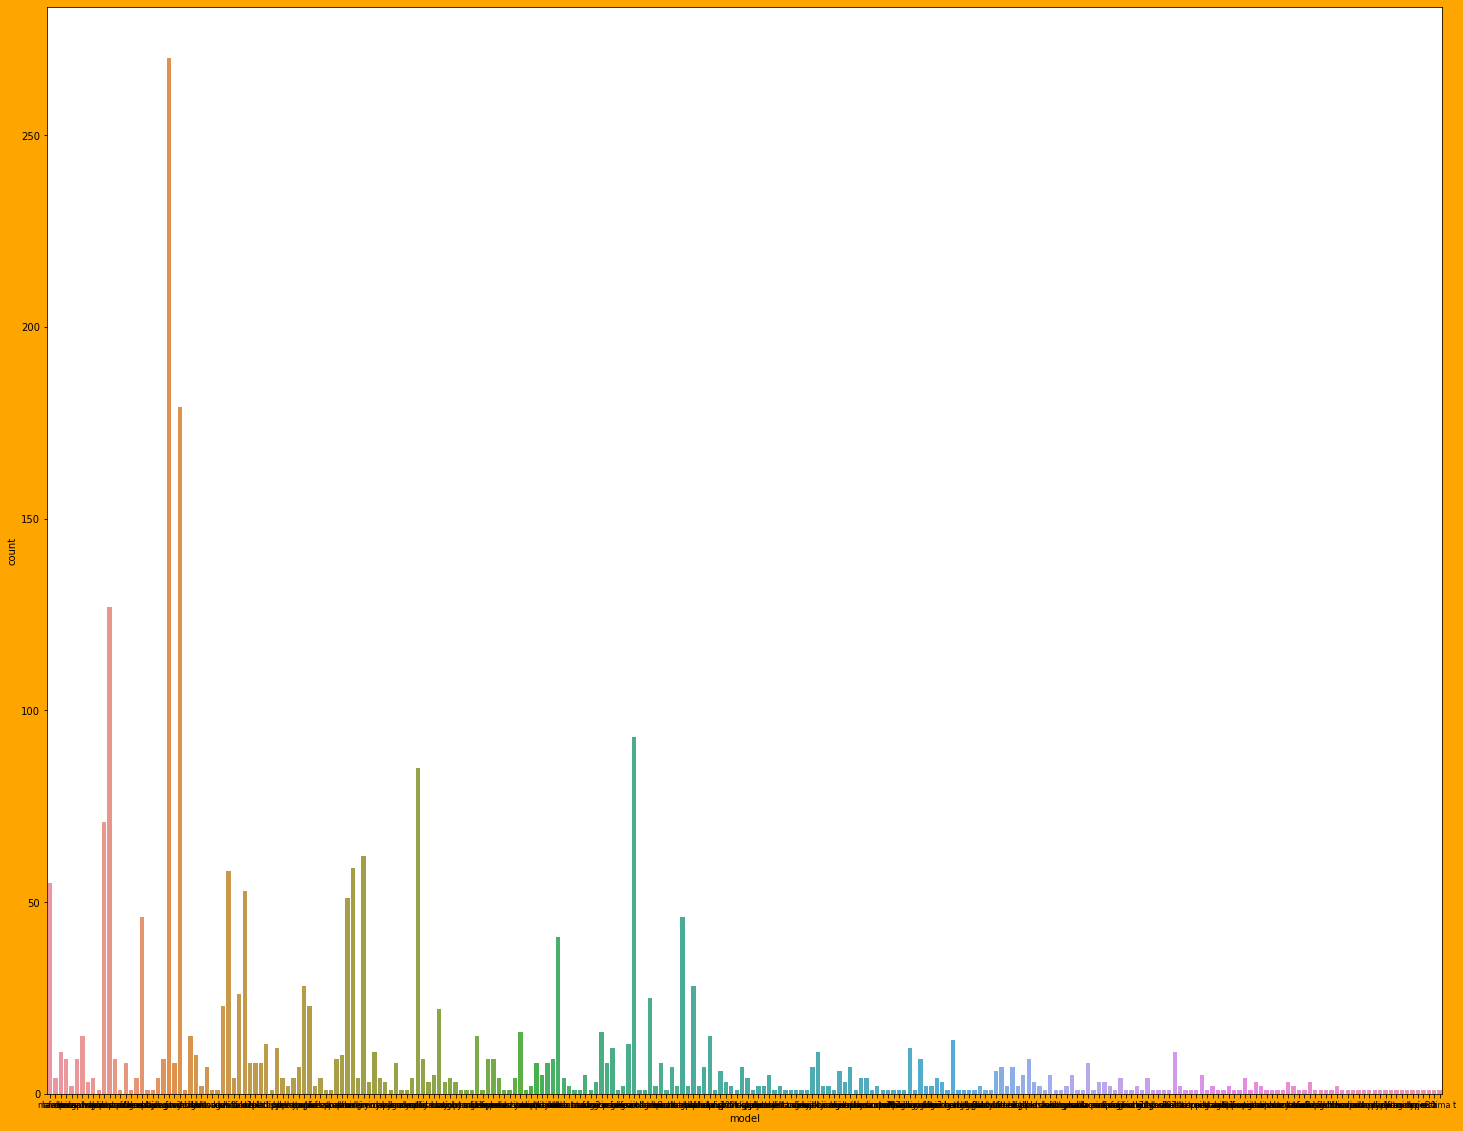

fit                     270
vitz                    179
passo                   127
ist                     93 
ractis                  85 
note                    71 
demio                   62 
wish                    59 
swift                   58 
march                   55 
sienta                  53 
raum                    51 
mark x                  46 
cube                    46 
noah                    41 
polo                    28 
alphard                 28 
tiida                   26 
corolla spacio          25 
verisa                  23 
x-trail                 23 
voxy                    22 
carry truck             16 
fun cargo               16 
brevis                  15 
step wgn                15 
golf                    15 
insight                 15 
3 series                14 
elgrand                 13 
bluebird sylphy         13 
ipsum                   12 
allion                  12 
bb                      12 
belta                   11 
corolla runx        

In [19]:
#Lets plot model (using countplot)
plt.figure(figsize=(25,20),facecolor='orange')
sns.countplot(x='model',data=data)
plt.xticks(size=8)
plt.show()
data.model.value_counts()

Fit name car is most for sale and its counts is 270. and total 258 cars model.

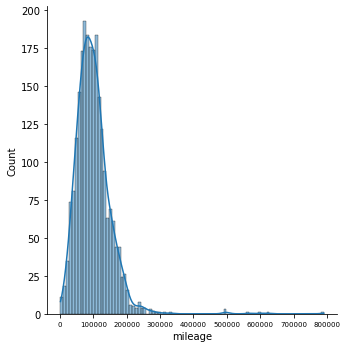

In [20]:
#Lets plot total running KM (mileage)

sns.displot(x='mileage',data=data,kde=True)
plt.xticks(size=7)
plt.show()

Here we can see that maximum car running KM is 100000 to 250000 KM

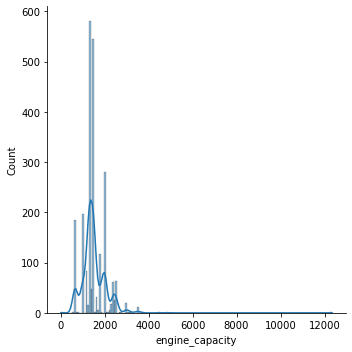

In [21]:
#Lets plot total volume of the cylinders (engine_capacity)
sns.displot(x='engine_capacity',data=data,kde=True)
plt.show()


Here we can see that  Maximum car engine_capacity is 0 to 2500

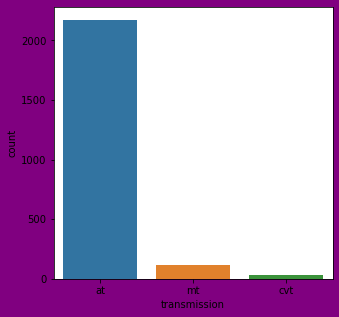

at     2171
mt     117 
cvt    30  
Name: transmission, dtype: int64

In [22]:
#Lets plot type of gear box in car('transmission')
plt.figure(figsize=(5,5),facecolor='purple')
sns.countplot(x='transmission',data=data)
plt.show()
data.transmission.value_counts()

Here ,  Types of gare in cars


MT - Manual transmission -> 117 Cars

AT - Automatic transmission -> 2171 Cars

CVT - Continuously Variable Transmission -> 30 Cars

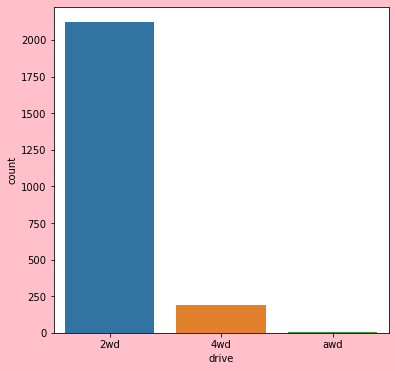

2wd    2121
4wd    192 
awd    5   
Name: drive, dtype: int64

In [23]:
#Lets check how much car have 2 wheel drive or 4 wheel drive and All wheel Drive (drive)
plt.figure(figsize=(6,6),facecolor='pink')
sns.countplot(x='drive',data=data)
plt.show()
data.drive.value_counts()

Here we can see that 

2 Wheel Drive Car is  -> 2121


4 Wheel Drive Car is -> 192


All Wheel Drive Car is -> 5

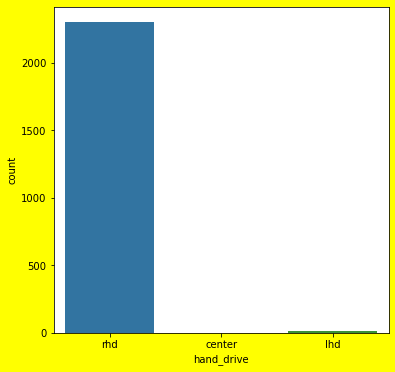

rhd       2301
lhd       16  
center    1   
Name: hand_drive, dtype: int64

In [24]:
#Lets plot How much Right hand drive and left hand drive car ('hand_drive')
plt.figure(figsize=(6,6),facecolor='yellow')
sns.countplot(x='hand_drive',data=data)
plt.show()
data.hand_drive.value_counts()

Here we can see that we have , 


Right Hand Drive Car - > 2301 

Left Hand Drive Car - > 16

Center Drive Car is - > 1

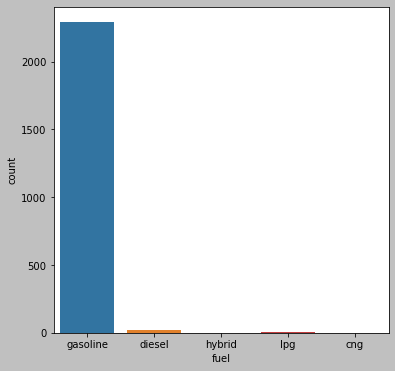

gasoline    2290
diesel      18  
lpg         7   
hybrid      2   
cng         1   
Name: fuel, dtype: int64

In [25]:
#Lets plot all car fuel (fuel)
plt.figure(figsize=(6,6),facecolor='silver')
sns.countplot(x='fuel',data=data)
plt.show()
data.fuel.value_counts()

Here we can see that , Types of Car by Fuel

Gasoline Car - 2290


Diesel Car - 18

LPG Car - 7

Hybrid Car - 2

CNG  Car - 1

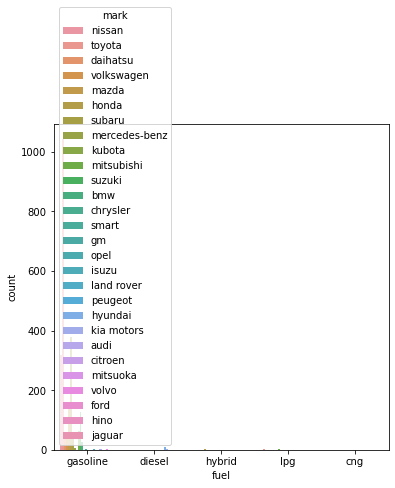

In [26]:
#Lets plot model based on fuel type
plt.figure(figsize=(6,6))
sns.countplot(x='fuel',hue='mark',data=data)
plt.show()

Here we can see that maximum company using gasoline .

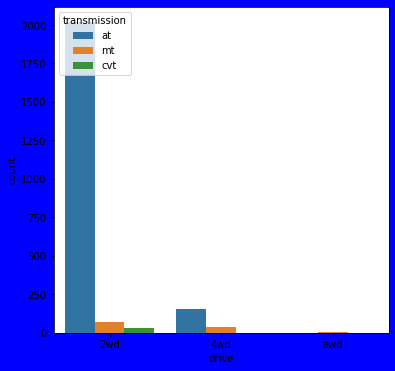

In [27]:
#Lets plot transmission aith drive
plt.figure(figsize=(6,6),facecolor='blue')
sns.countplot(x='drive',hue='transmission',data=data)
plt.show()

More then 2000 cars are 2 wheel drive . 

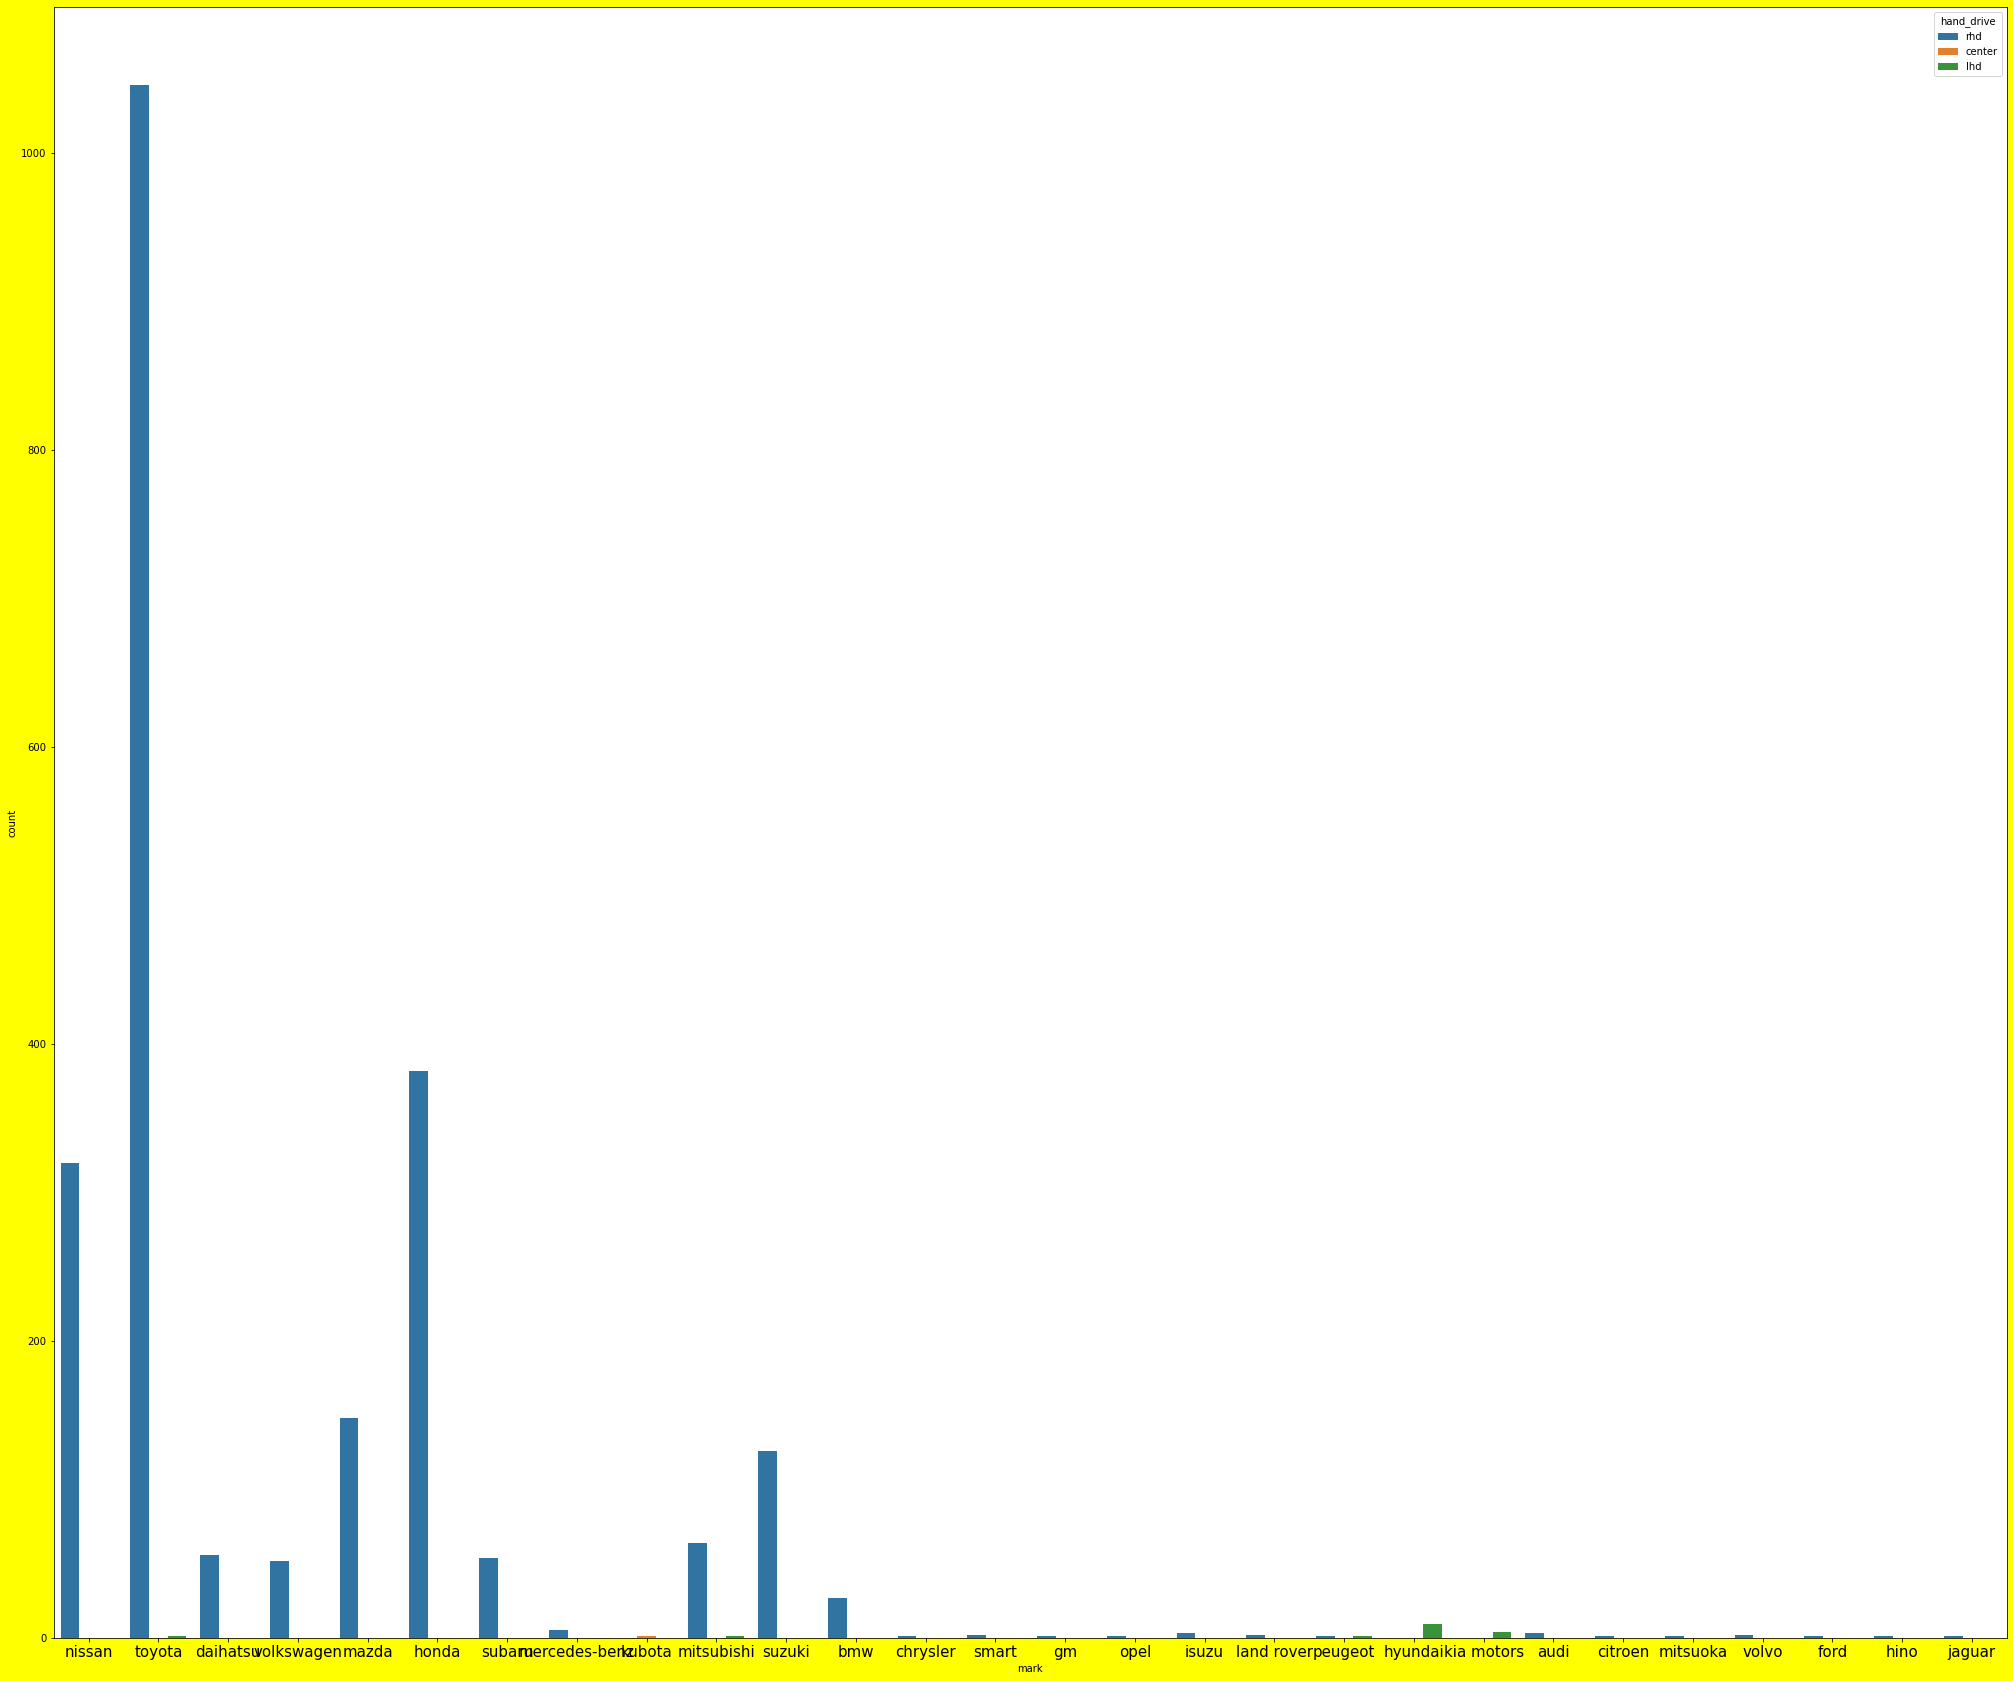

In [28]:
#Lets plot mark with hand drive
plt.figure(figsize=(35,30),facecolor='yellow')
sns.countplot(x='mark',hue='hand_drive',data=data)
plt.xticks(size=15)
plt.show()

Here we can se that from company toyota have maximum cars with 2 wheel drive

In [29]:
data.head()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [30]:
#Lets check value counts of mark
data.mark.value_counts()

toyota           1047
honda            382 
nissan           320 
mazda            148 
suzuki           126 
mitsubishi       65  
daihatsu         56  
subaru           54  
volkswagen       52  
bmw              27  
hyundai          9   
mercedes-benz    5   
kia motors       4   
isuzu            3   
audi             3   
smart            2   
volvo            2   
land rover       2   
peugeot          2   
hino             1   
mitsuoka         1   
ford             1   
gm               1   
citroen          1   
opel             1   
chrysler         1   
kubota           1   
jaguar           1   
Name: mark, dtype: int64

In [31]:
#Lets plot Car company name by model and Year
data.groupby(['mark'])['model','year'].value_counts()

mark           model                 year
audi           a4                    2005    2 
               a4 avant              2005    1 
bmw            3 series              2005    7 
               mini                  2003    3 
               1 series              2005    2 
               3 series              2006    2 
                                     2003    2 
                                     2004    1 
                                     2002    1 
               1 series              2004    1 
                                     2006    1 
               mini cooper           2003    1 
               mini                  2009    1 
                                     2002    1 
               3 series              2007    1 
               mini                  2008    1 
                                     2005    1 
                                     2004    1 
chrysler       pt cruiser            2001    1 
citroen        xsara picasso         2004    1

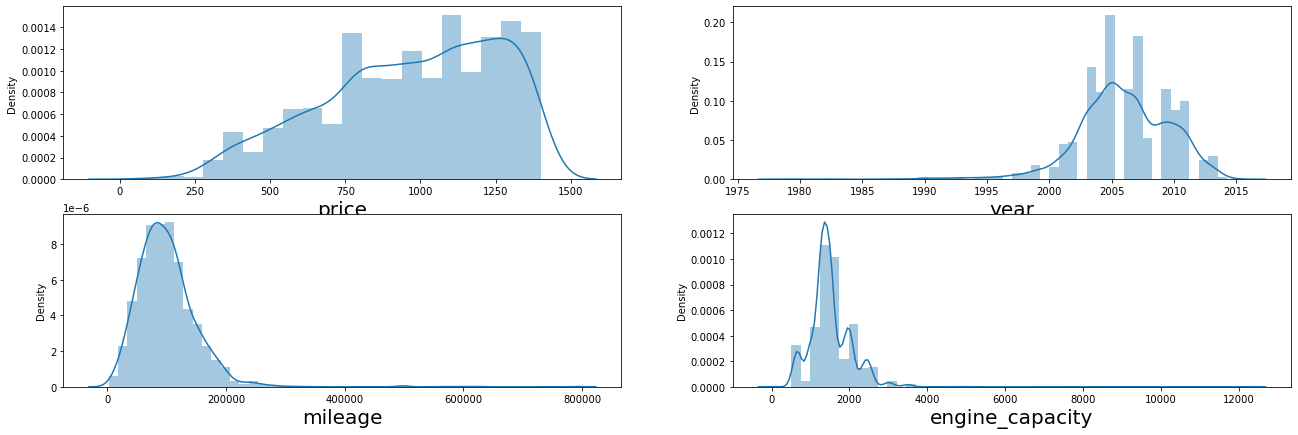

In [32]:
#Lets check the distribution of the columns
plt.figure(figsize=(22,7))
plotnumber=1
for column in data[['price','year','mileage','engine_capacity']]:#Here we taking only numerical data
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

# Observations

Year -> Left Skewed


Mileage -> Right Skewed


Engine Capacity -> Right Skewed

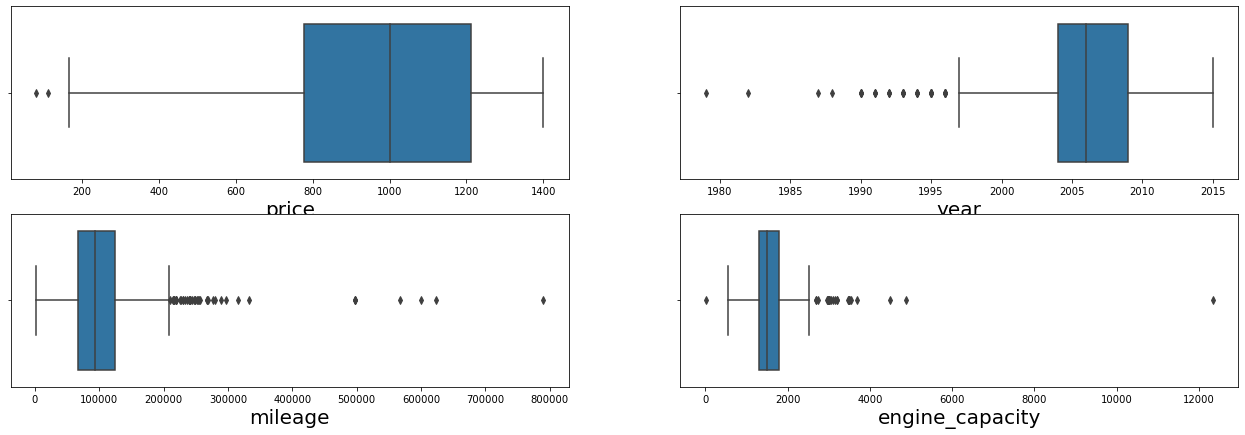

In [33]:
#Lets Plot BOX plot and Check Outliers by visualization
#Lets check the distribution of the columns
plt.figure(figsize=(22,7))
plotnumber=1
for column in data[['price','year','mileage','engine_capacity']]:#Here we taking only numerical data
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

# Observation


Year -> Have Outiers

Mileage -> Have Outliers


Engine Capacity -> Have Outliers

# First we have to check correlatiom before losing any data because we have small dataset .¶

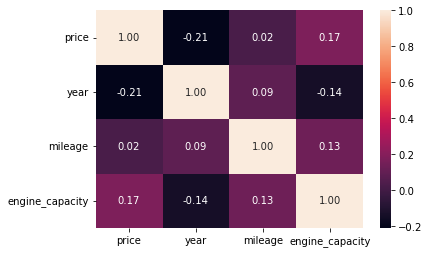

In [34]:
sns.heatmap(data.corr(),annot=True,fmt='.2f',)
plt.show()

# Observations

1 - Price have almost 17% relationship with engine_capacity

2- Price have almost 2% relationship with mileage

2 -Price have almost 21% relationship with Year

In [35]:
#Lets check correlation with target columns
data.corr()['price']

price              1.000000
year              -0.211092
mileage            0.021581
engine_capacity    0.173748
Name: price, dtype: float64

# Observatios 


Correlation with Target Variable


- Year  - 21% Relation

- Mileage - 02% Relation


- Engine Capacity - 17 % Relations

In [36]:
#Lets check Skewness
data.skew()

price             -0.466780
year              -0.845917
mileage            3.089142
engine_capacity    4.038892
dtype: float64

Here we set threshold +-0.5 foe skewness.

- price             -0.466780
- year              -0.845917
- mileage            3.089142
- engine_capacity    4.038892



Here we can clearly see that No data points come in our range. We use power transformer to remove skewness. 

# Data Preprocessing 

In [37]:
#Lets use encoding technique and convert all categorical data to numerical data
#First filter categorical column
numeric=['int8','int16','int32','int64','float','float32','float64']
categorical_column=[]
feature=data.columns.values.tolist()

for col in feature:
    if data[col].dtype in numeric:
        continue
    categorical_column.append(col)
categorical_column

['mark', 'model', 'transmission', 'drive', 'hand_drive', 'fuel']

In [38]:
df_dummies=pd.get_dummies(data[categorical_column],drop_first=True)
df_dummies.head()

,mark_bmw,mark_chrysler,mark_citroen,mark_daihatsu,mark_ford,mark_gm,mark_hino,mark_honda,mark_hyundai,mark_isuzu,mark_jaguar,mark_kia motors,mark_kubota,mark_land rover,mark_mazda,mark_mercedes-benz,mark_mitsubishi,mark_mitsuoka,mark_nissan,mark_opel,mark_peugeot,mark_smart,mark_subaru,mark_suzuki,mark_toyota,mark_volkswagen,mark_volvo,model_207,model_3 series,model_307,model_a-class,model_a4,model_a4 avant,model_accord,model_acty truck,model_acty van,model_ad,model_ad expert,model_ad van,model_aerio,model_airwave,model_allex,model_allion,model_alphard,model_alphard g,model_alphard v,model_altezza,model_alto,model_aristo,model_atenza,model_atenza sport,model_atenza wagon,model_atrai,model_atrai wagon,model_auris,model_avensis,model_axela,model_axela sport,model_az-wagon,model_b-class,model_bb,model_belta,model_biante,model_bluebird sylphy,model_bongo,model_bongo brawny truck,model_bongo friendee,model_bongo truck,model_bongo van,model_boon,model_brevis,model_c-class,model_c30,model_caldina,model_cami,model_canter,model_canter guts,model_carina,model_carol,model_carol eco,model_carry truck,model_cerato,model_chaser,model_chevrolet others,model_cima,model_civic ferio,model_civic hybrid,model_clipper,model_clipper truck,model_clipper van,model_colt,model_coltplus,model_comfort,model_coo,model_corolla axio,model_corolla fielder,model_corolla ii,model_corolla rumion,model_corolla runx,model_corolla sedan,model_corolla spacio,model_corona premio,model_cr-v,model_crown,model_crown comfort,model_cube,model_cube cubic,model_delica,model_delica d2,model_delica truck,model_demio,model_dion,model_discovery,model_duet,model_dutro,model_e-class,model_eclipse,model_edix,model_ek sport,model_ek wagon,model_elf truck,model_elgrand,model_elysion,model_escape,model_escudo,model_esse,model_estima,model_estima t,model_every,model_exiga,model_fit,model_fit hybrid,model_fit shuttle,model_forester,model_forfour,model_freed,model_freed spike,model_freelander,model_fuga,model_fun cargo,model_gaia,model_galant fortis,model_gloria hardtop,model_golf,model_golf variant,model_grand escudo,model_hijet cargo,model_hijet truck,model_hr-v,model_impreza,model_impreza anesis,model_impreza sportswagon,model_insight,model_inspire,model_ipsum,model_isis,model_ist,model_jetta,model_jimny,model_kubota others,model_lafesta,model_lancer,model_lancer cargo,model_landy,model_lapin,model_legacy,model_legacy b4,model_legacy touring wagon,model_life,model_march,model_mark ii,model_mark ii blit,model_mark x,model_masterace surf,model_mdx,model_mercedes-benz others,model_mini,model_mini cooper,model_minica,model_minicab truck,model_minicab van,model_mira,model_mira avy,model_mira es,model_mirage,model_miragino,model_moco,model_move,model_move custom,model_move latte,model_mpv,model_mr wagon,model_murano,model_naked,model_new beetle,model_noah,model_note,model_nv100clipper,model_odyssey,model_opa,model_otti,model_outback,model_outlander,model_pajero io,model_pajero mini,model_palette,model_passat,model_passo,model_passo sette,model_pixis space,model_platz,model_pleo,model_polo,model_porte,model_premacy,model_premio,model_pride,model_probox,model_probox van,model_progres,model_pt cruiser,model_r2,model_ractis,model_raum,model_regius wagon,model_rx-8,model_s-mx,model_sambar,model_sambar truck,model_santa fe,model_serena,model_sienta,model_skyline,model_solio,model_spade,model_splash,model_stagea,model_stella,model_step wgn,model_stream,model_succeed van,model_sunny,model_swift,model_sx4,model_sx4 sedan,model_tanto,model_teana,model_terios,model_terios kid,model_terracan,model_tiida,model_tiida latio,model_titan dash,model_town box,model_townace noah,model_townace van,model_trajet,model_tribute,model_tucson,model_v70,model_vamos,model_vanette truck,model_vanette van,model_vectra,model_verisa,model_verossa,model_viewt,model_visto,model_vitz,model_vivio,model_voltz,model_voxy,model_wagon r,model_wagon r rr,model_windom,model_wingroad,model_wish,model_wizard,model_x-trail,model_x-t

In [39]:
#Lets join with DataFrame
data=data.join(df_dummies)


In [40]:
#Lets drop unwanted column (Like categorical column)
data.drop(columns=categorical_column,axis=1,inplace=True)

In [41]:
#Lets check columns are deleted or not
print(data.shape)
data.head()

(2318, 298)


,price,year,mileage,engine_capacity,mark_bmw,mark_chrysler,mark_citroen,mark_daihatsu,mark_ford,mark_gm,mark_hino,mark_honda,mark_hyundai,mark_isuzu,mark_jaguar,mark_kia motors,mark_kubota,mark_land rover,mark_mazda,mark_mercedes-benz,mark_mitsubishi,mark_mitsuoka,mark_nissan,mark_opel,mark_peugeot,mark_smart,mark_subaru,mark_suzuki,mark_toyota,mark_volkswagen,mark_volvo,model_207,model_3 series,model_307,model_a-class,model_a4,model_a4 avant,model_accord,model_acty truck,model_acty van,model_ad,model_ad expert,model_ad van,model_aerio,model_airwave,model_allex,model_allion,model_alphard,model_alphard g,model_alphard v,model_altezza,model_alto,model_aristo,model_atenza,model_atenza sport,model_atenza wagon,model_atrai,model_atrai wagon,model_auris,model_avensis,model_axela,model_axela sport,model_az-wagon,model_b-class,model_bb,model_belta,model_biante,model_bluebird sylphy,model_bongo,model_bongo brawny truck,model_bongo friendee,model_bongo truck,model_bongo van,model_boon,model_brevis,model_c-class,model_c30,model_caldina,model_cami,model_canter,model_canter guts,model_carina,model_carol,model_carol eco,model_carry truck,model_cerato,model_chaser,model_chevrolet others,model_cima,model_civic ferio,model_civic hybrid,model_clipper,model_clipper truck,model_clipper van,model_colt,model_coltplus,model_comfort,model_coo,model_corolla axio,model_corolla fielder,model_corolla ii,model_corolla rumion,model_corolla runx,model_corolla sedan,model_corolla spacio,model_corona premio,model_cr-v,model_crown,model_crown comfort,model_cube,model_cube cubic,model_delica,model_delica d2,model_delica truck,model_demio,model_dion,model_discovery,model_duet,model_dutro,model_e-class,model_eclipse,model_edix,model_ek sport,model_ek wagon,model_elf truck,model_elgrand,model_elysion,model_escape,model_escudo,model_esse,model_estima,model_estima t,model_every,model_exiga,model_fit,model_fit hybrid,model_fit shuttle,model_forester,model_forfour,model_freed,model_freed spike,model_freelander,model_fuga,model_fun cargo,model_gaia,model_galant fortis,model_gloria hardtop,model_golf,model_golf variant,model_grand escudo,model_hijet cargo,model_hijet truck,model_hr-v,model_impreza,model_impreza anesis,model_impreza sportswagon,model_insight,model_inspire,model_ipsum,model_isis,model_ist,model_jetta,model_jimny,model_kubota others,model_lafesta,model_lancer,model_lancer cargo,model_landy,model_lapin,model_legacy,model_legacy b4,model_legacy touring wagon,model_life,model_march,model_mark ii,model_mark ii blit,model_mark x,model_masterace surf,model_mdx,model_mercedes-benz others,model_mini,model_mini cooper,model_minica,model_minicab truck,model_minicab van,model_mira,model_mira avy,model_mira es,model_mirage,model_miragino,model_moco,model_move,model_move custom,model_move latte,model_mpv,model_mr wagon,model_murano,model_naked,model_new beetle,model_noah,model_note,model_nv100clipper,model_odyssey,model_opa,model_otti,model_outback,model_outlander,model_pajero io,model_pajero mini,model_palette,model_passat,model_passo,model_passo sette,model_pixis space,model_platz,model_pleo,model_polo,model_porte,model_premacy,model_premio,model_pride,model_probox,model_probox van,model_progres,model_pt cruiser,model_r2,model_ractis,model_raum,model_regius wagon,model_rx-8,model_s-mx,model_sambar,model_sambar truck,model_santa fe,model_serena,model_sienta,model_skyline,model_solio,model_spade,model_splash,model_stagea,model_stella,model_step wgn,model_stream,model_succeed van,model_sunny,model_swift,model_sx4,model_sx4 sedan,model_tanto,model_teana,model_terios,model_terios kid,model_terracan,model_tiida,model_tiida latio,model_titan dash,model_town box,model_townace noah,model_townace van,model_trajet,model_tribute,model_tucson,model_v70,model_vamos,model_vanette truck,model_vanette van,model_vectra,model_verisa,model_verossa,model_viewt,model_visto,model_vitz,model_vivio,model_voltz,model_voxy,model_wagon r,model_wagon r rr,model_windom,model_wingroad,model_wish,m

Now we completed Encoding Part and Visualization part

Lets Handle the Outlies By using Zscore



We see above, only BMI column contains outliers .lets check again

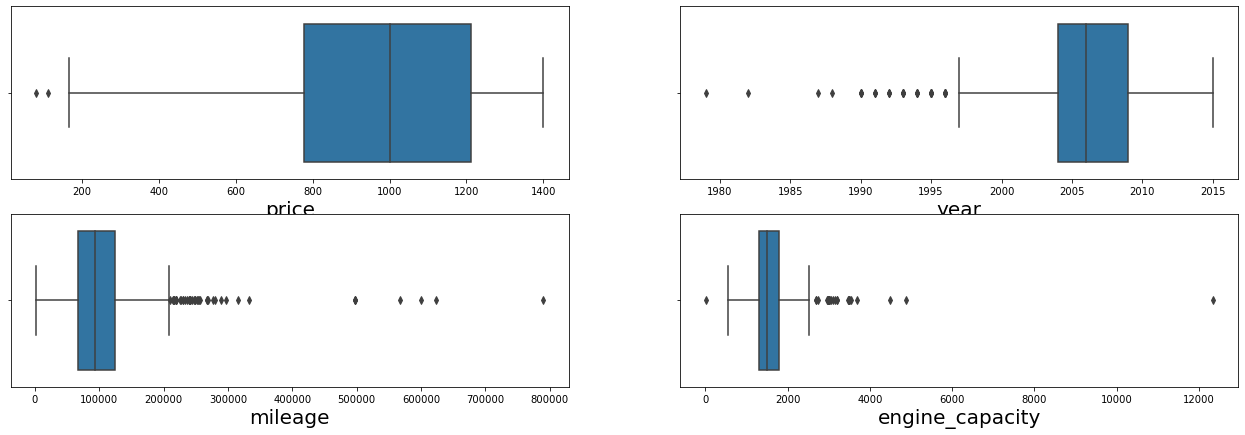

In [42]:
#Lets Plot BOX plot and Check Outliers by visualization
#Lets check the distribution of the columns
plt.figure(figsize=(22,7))
plotnumber=1
for column in data[['price','year','mileage','engine_capacity']]:#Here we taking only numerical data
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

We can . Clearly see that there is outliers we have to treat that. using zscore

In [43]:
data.shape

(2318, 298)

In [44]:
#Lets import zscore
import numpy as np
from scipy.stats import zscore
z_score=zscore(data[['year','mileage','engine_capacity']])
abs_score=np.abs(z_score)
filtering_entry=(abs_score<4).all(axis=1)
data=data[filtering_entry]
data.describe()

,price,year,mileage,engine_capacity,mark_bmw,mark_chrysler,mark_citroen,mark_daihatsu,mark_ford,mark_gm,mark_hino,mark_honda,mark_hyundai,mark_isuzu,mark_jaguar,mark_kia motors,mark_kubota,mark_land rover,mark_mazda,mark_mercedes-benz,mark_mitsubishi,mark_mitsuoka,mark_nissan,mark_opel,mark_peugeot,mark_smart,mark_subaru,mark_suzuki,mark_toyota,mark_volkswagen,mark_volvo,model_207,model_3 series,model_307,model_a-class,model_a4,model_a4 avant,model_accord,model_acty truck,model_acty van,model_ad,model_ad expert,model_ad van,model_aerio,model_airwave,model_allex,model_allion,model_alphard,model_alphard g,model_alphard v,model_altezza,model_alto,model_aristo,model_atenza,model_atenza sport,model_atenza wagon,model_atrai,model_atrai wagon,model_auris,model_avensis,model_axela,model_axela sport,model_az-wagon,model_b-class,model_bb,model_belta,model_biante,model_bluebird sylphy,model_bongo,model_bongo brawny truck,model_bongo friendee,model_bongo truck,model_bongo van,model_boon,model_brevis,model_c-class,model_c30,model_caldina,model_cami,model_canter,model_canter guts,model_carina,model_carol,model_carol eco,model_carry truck,model_cerato,model_chaser,model_chevrolet others,model_cima,model_civic ferio,model_civic hybrid,model_clipper,model_clipper truck,model_clipper van,model_colt,model_coltplus,model_comfort,model_coo,model_corolla axio,model_corolla fielder,model_corolla ii,model_corolla rumion,model_corolla runx,model_corolla sedan,model_corolla spacio,model_corona premio,model_cr-v,model_crown,model_crown comfort,model_cube,model_cube cubic,model_delica,model_delica d2,model_delica truck,model_demio,model_dion,model_discovery,model_duet,model_dutro,model_e-class,model_eclipse,model_edix,model_ek sport,model_ek wagon,model_elf truck,model_elgrand,model_elysion,model_escape,model_escudo,model_esse,model_estima,model_estima t,model_every,model_exiga,model_fit,model_fit hybrid,model_fit shuttle,model_forester,model_forfour,model_freed,model_freed spike,model_freelander,model_fuga,model_fun cargo,model_gaia,model_galant fortis,model_gloria hardtop,model_golf,model_golf variant,model_grand escudo,model_hijet cargo,model_hijet truck,model_hr-v,model_impreza,model_impreza anesis,model_impreza sportswagon,model_insight,model_inspire,model_ipsum,model_isis,model_ist,model_jetta,model_jimny,model_kubota others,model_lafesta,model_lancer,model_lancer cargo,model_landy,model_lapin,model_legacy,model_legacy b4,model_legacy touring wagon,model_life,model_march,model_mark ii,model_mark ii blit,model_mark x,model_masterace surf,model_mdx,model_mercedes-benz others,model_mini,model_mini cooper,model_minica,model_minicab truck,model_minicab van,model_mira,model_mira avy,model_mira es,model_mirage,model_miragino,model_moco,model_move,model_move custom,model_move latte,model_mpv,model_mr wagon,model_murano,model_naked,model_new beetle,model_noah,model_note,model_nv100clipper,model_odyssey,model_opa,model_otti,model_outback,model_outlander,model_pajero io,model_pajero mini,model_palette,model_passat,model_passo,model_passo sette,model_pixis space,model_platz,model_pleo,model_polo,model_porte,model_premacy,model_premio,model_pride,model_probox,model_probox van,model_progres,model_pt cruiser,model_r2,model_ractis,model_raum,model_regius wagon,model_rx-8,model_s-mx,model_sambar,model_sambar truck,model_santa fe,model_serena,model_sienta,model_skyline,model_solio,model_spade,model_splash,model_stagea,model_stella,model_step wgn,model_stream,model_succeed van,model_sunny,model_swift,model_sx4,model_sx4 sedan,model_tanto,model_teana,model_terios,model_terios kid,model_terracan,model_tiida,model_tiida latio,model_titan dash,model_town box,model_townace noah,model_townace van,model_trajet,model_tribute,model_tucson,model_v70,model_vamos,model_vanette truck,model_vanette van,model_vectra,model_verisa,model_verossa,model_viewt,model_visto,model_vitz,model_vivio,model_voltz,model_voxy,model_wagon r,model_wagon r rr,model_windom,model_wingroad,model_wish,m

In [45]:
data.shape

(2296, 298)

# Check How Much Data Loss

In [46]:
data_loss=((2318-2260)/2318)*100
data_loss

2.5021570319240722

Here we loss 2.5% data

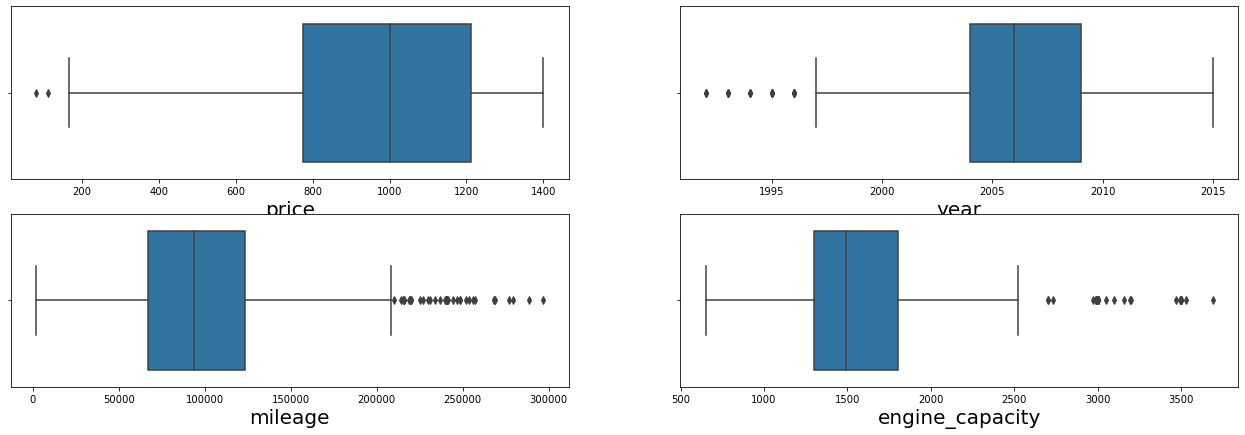

In [47]:
#Check again the outliers using boxplot
#Lets Plot BOX plot and Check Outliers by visualization
#Lets check the distribution of the columns
plt.figure(figsize=(22,7))
plotnumber=1
for column in data[['price','year','mileage','engine_capacity']]:#Here we taking only numerical data
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

Here we remove outliers using zscore method

# Dividing data in feature and vectors

In [48]:
x=data.drop(columns='price')#Feature
y=data.price#Target

# Transforming data to remove skewness

In [49]:
from sklearn.preprocessing import power_transform

In [50]:
x_scaled=power_transform(x,method='yeo-johnson')
x_scaled

array([[-0.89401312, -0.31905004, -0.46246838, ...,  0.09835945,
        -0.02952693, -0.0417756 ],
       [ 1.15490242, -1.0456964 , -0.55688696, ...,  0.09835945,
        -0.02952693, -0.0417756 ],
       [-0.34175083, -1.20821777,  1.03446712, ...,  0.09835945,
        -0.02952693, -0.0417756 ],
       ...,
       [-0.34175083,  0.16698033, -2.11328153, ...,  0.09835945,
        -0.02952693, -0.0417756 ],
       [-1.67628869,  1.49160164, -2.11328153, ...,  0.09835945,
        -0.02952693, -0.0417756 ],
       [-0.34175083, -0.51185046,  2.49933787, ...,  0.09835945,
        -0.02952693, -0.0417756 ]])

In [51]:
#lets do Feature Selection Test Using PCA
from sklearn.decomposition import PCA

In [52]:
#Lets assign PCA in one Variable and apply on Scaled Data
pca=PCA()
pca.fit_transform(x_scaled)

array([[-2.15615397e-01,  6.76838382e-01, -1.56823773e+00, ...,
         2.15376509e-16,  5.50183950e-17, -6.19331530e-17],
       [-3.03309232e-01,  6.88375132e-01, -2.35798361e+00, ...,
        -2.52140530e-16,  4.76534304e-17, -7.40722293e-17],
       [-1.40590621e-01, -1.65188708e-01, -1.64009019e+00, ...,
        -7.98122082e-16, -1.11942753e-16,  1.06629095e-16],
       ...,
       [-3.76806792e-01,  2.22890077e+00,  2.47767704e+00, ...,
        -7.91129936e-18,  4.54969311e-18, -1.06691336e-17],
       [-2.02437410e-01,  2.91152595e+00,  9.64795523e-01, ...,
         2.53253607e-18,  3.00279265e-18, -4.53267960e-18],
       [-6.47231475e-02, -2.58235751e+00,  9.41224432e-01, ...,
         2.53253607e-18,  3.00279265e-18, -4.53267960e-18]])

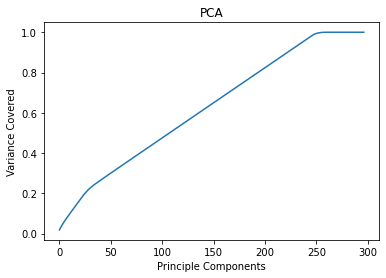

In [53]:
#Lets plot scree plot to check the best components.
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principle Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

So , Here we can see 240 Feature contain 100% data info so why i take left one . so i decide to remove

In [99]:
pca=PCA(n_components=240)
new_pump=pca.fit_transform(x_scaled)
princi_comp=pd.DataFrame(new_pump)

In [57]:
#lets do train test split
#Import train test split
from sklearn.model_selection import train_test_split
#Import Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#Import R2_score
from sklearn.metrics import r2_score,mean_squared_error

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
gbdt=GradientBoostingRegressor()

In [96]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.2,random_state=i)
    gbdt.fit(x_train,y_train)
    x_pred=gbdt.predict(x_train)
    y_pred=gbdt.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 0.48425651370806244
 At random state 0 , the testing accuracy is :- 0.2592907286998467


 At random state 1 , the Training accuracy is :- 0.49569963883419477
 At random state 1 , the testing accuracy is :- 0.17065367898116746


 At random state 2 , the Training accuracy is :- 0.46894829033277785
 At random state 2 , the testing accuracy is :- 0.3109291576622226


 At random state 3 , the Training accuracy is :- 0.4621354342691554
 At random state 3 , the testing accuracy is :- 0.26943880798053577


 At random state 4 , the Training accuracy is :- 0.48965760540070313
 At random state 4 , the testing accuracy is :- 0.17786009978921724


 At random state 5 , the Training accuracy is :- 0.48148487536652784
 At random state 5 , the testing accuracy is :- 0.24210975594310702


 At random state 6 , the Training accuracy is :- 0.4859490159595865
 At random state 6 , the testing accuracy is :- 0.16794917884768712


 At random state 7 , the Traini

So , Here we can select Random State - 3 .

In [78]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.20,random_state=2)

In [79]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("  =================Training Score==================  ")
        print("Accuracy Score ==> ",r2_score(y_train,y_pred))
    elif train== False:
        pred=clf.predict(x_test)
        print(" ====== Testing Score ======")
        print("Accuracy Score==> ",r2_score(y_test,pred))
        

In [80]:
gbdt.fit(x_train,y_train)

GradientBoostingRegressor()

In [81]:
#Call the function and pass dataset to check train and test score .

print_score(gbdt,x_train,x_test,y_train,y_test,train=True)

print_score(gbdt,x_train,x_test,y_train,y_test,train=False)

  =================Training Score==================  
Accuracy Score ==>  0.46894829033277774
 ====== Testing Score ======
Accuracy Score==>  0.31389642181956845


In [85]:
p_pred=gbdt.score(x_test,y_test)
p_pred

0.31389642181956845

# Regularization -

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [64]:
#lets import Lasso (Least absolute shrinkage and selection operator)
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
#LASSOCV will return best alpha after max iteration
#normalize is subtracting the mean and divide by L2_norm



lasscv=LassoCV(alphas = None , max_iter =100,normalize=True)
lasscv.fit(x_train,y_train)
          
          
          


LassoCV(max_iter=100, normalize=True)

In [65]:
#best alpha paremetere
alpha=lasscv.alpha_
alpha

0.16154777538653306

In [66]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.16154777538653306)

In [67]:
lasso_reg.score(x_test,y_test)

-0.2580101895174063

So , With lasso we get 25 % accuracy with testing data 

# Using Ridge Regression Model.
Ridge will return best alpha and coefficients after performing 10 Cross validation

In [68]:
# Ridge will return best alpha and coefficients after performing 10 Cross validation

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [69]:
ridgecv.alpha_

0.09099999999999998

In [70]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [71]:
ridge_model.score(x_test,y_test)

-123.72604378227098

Our model is over fitted lets try with another algorithm

In [72]:
#Lets see MSE,MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [73]:
#MAE
y_pred=gbdt.predict(x_test)
mean_absolute_error(y_test,y_pred)

204.08855077623508

In [74]:
#MSR
x_pred=gbdt.predict(x_test)
mean_squared_error(y_test,x_pred)

62257.77160560911

We have lost of error in our model Lets do hyperparameter tuning,

In [75]:
#Lets do Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [76]:
param={'loss':['squared_error', 'absolute_error'],
      'n_estimators':range(1,6),
      'criterion':['friedman_mse', 'squared_error', 'mse'],
      'min_samples_split':range(5,7),
      'min_samples_leaf':range(7,9),
      'max_depth':range(9,11)}
       
       

In [ ]:
clf=GridSearchCV(gbdt,param)
clf.fit(x_train,y_train)
print(clf.best_params_)

In [ ]:
gbdt=GradientBoostRegressor(loss='',n_estimators='',criterion='',min_samples_split='',min_samples_leaf='',max_depth='')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print("R2 Score",rfs*100)
rfs_score=cross_val_score(rf,feature,target,cv=5)
rfc=rfs_score.mean()
print('Cross Val Score',rfc*100)

I dont have much time to complete these project because my laptop is running very slow.


So i am going with gbdt score

# Conclusion

In [91]:
import pickle
filename=('Japan Used Cars Price Prediction')
pickle.dump(gbdt,open(filename,'wb'))

In [92]:
loaded_model=pickle.load(open('Japan Used Cars Price Prediction','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

31.389642181956845


In [95]:
conclusion=pd.DataFrame([loaded_model.predict(x_train)[:],y_pred[:]],index=['predicted','original'])

In [96]:
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [97]:
#Student of DataTrained 
#Student of DataScience - Sauarv
#Time - 23:14
#Date - 18-11-2022

In [98]:
jupyter notebook --generate-config

SyntaxError: invalid syntax (1387249117.py, line 1)